# Renewable resources: Fisheries model

----------
- Leon Bremer - Vrije Universiteit Amsterdam & Tinbergen Institute
- February 27, 2023
- Course: Environmental and Resource Economics (ERE) 2022-23 for MSc STREEM
- Objective: Fisheries model visualization
----------

This notebook plots a few graphs of the fisheries model seen in the tutorial. It is written in Python. Note that it does not provide a full analysis of the model, but it provides you with some additional visualizations. No need to understand the Python code, but feel free to play around with it by downloading the code from my [GitHub page](https://github.com/Leonbremer/fisheries).

First, we import the packages needed.

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

Second, let us define some global parameters.

In [2]:
# parameters
k = 10# max supported fish stock in millions
alpha = .00075# ease-of-harvesting parameter
gamma = .1# natural fish growth parameter
s = np.linspace(0,k+1,k*100)# Fish stock's domain for plotting
n = 100# number of fishers
p = 500# price
w = 1# wage

Third, we define the functions in our model. Recall the model's functions.
- Harvesting: $h_i = h(\alpha, S, e_i) = \alpha S e_i$ with $S \geq 0$, $\alpha>0$, $e_i \geq 0$.
- Regeneration: $G(S) = \gamma S \left( 1 - \frac{S}{K} \right)$ with $\gamma > 0$ and $K > 0$.

In [3]:
# Regeneration function
def G(gamma, S, K):
    """
    Growth function of the fish population.

    Parameters
    ----------
    gamma : number
        Exogenous natural growth parameter.
    S : number
        Stock of fish.
    K : number
        Maximum supported stock of fish by the natural environment.

    Returns
    -------
    g : number
        Number of new fish.
    """
    g = gamma * S * (1 - S/K)
    
    return g


# Harvesting function
def H(alpha, S, e):
    """
    Harvesting function.

    Parameters
    ----------
    alpha : number
        Exogenous parameter of harvesting ease.
    S : number
        Stock of fish.
    e : number
        Effort exerted by fisher.

    Returns
    -------
    h : number
        Number of fish harvested.
    """
    h = alpha * S * e
    
    return h


# Costs
def c(e, w):
    """
    Cost function.

    Parameters
    ----------
    e : number
        Effort exerted by fisher.
    w : number
        Wage rate per efforts.

    Returns
    -------
    cost : number
        Cost of effort.
    """
    cost = e * w
    
    return cost

## Biological equilibrium

Let us first look at the natural fish stock by plotting the regeneration function.

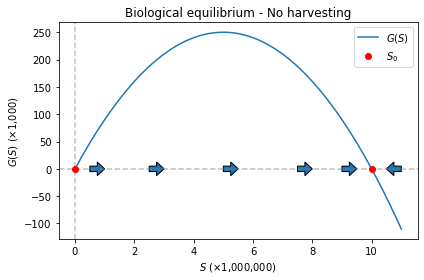

In [4]:
# Biological equilibrium
plt.axhline(0,linestyle='--',color="grey",alpha=.5)
plt.axvline(0,linestyle='--',color="grey",alpha=.5)
for h in [.5, 2.5, 5, 7.5, 9]:
    plt.arrow(x=h, y=0, dx=.5, dy=0, width=10, length_includes_head=True, head_width=25, head_length=.25)
plt.arrow(x=11, y=0, dx=-.5, dy=0, width=10, length_includes_head=True, head_width=25, head_length=.25)
plt.title('Biological equilibrium - No harvesting')
plt.plot(s, G(gamma=gamma, S=s, K=k)*1000, label=r'$G(S)$')
plt.plot([0,10,], [0,0,], 'ro', label=r'$S_0$')
plt.xlabel(r'$S$ ($\times$1,000,000)')
plt.ylabel(r'$G(S)$ ($\times$1,000)')
plt.tight_layout()
plt.legend()
plt.show()

This shows the natural regeneration of the renewable resource. We note that there are TWO biological equilibriums, which can be found by setting $G(S) = 0$. This results in (1) $S=K=10$ million or (2) $S=0$. The first equilibrium occurs because beyond 10 million fish the growth in fish stock is negative, as the ocean reached its capacity to support fish and the fish will starve. The second equilibrium is an extinction equilibrium. 0 fish cannot reproduce. The first (second) equilibrium is stable (unstable), meaning that small deviations from the equilibrium will (not) result in a gravitation back to that same equilibrium (indicated with the arrows).

Also note the maximum growth halfway $K$. This is relevant later.

### Growth over time

We can also make a plot over time. The following plot start with a stock of 100,000 fish (only 1% of $K$) and shows you how many periods it takes the stock to rebound to nearly its full capacity $K$.

In [5]:
T = np.arange(101)
S0 = k/100
S0e = 0

In [6]:
def stock_time(S_start,times):
    stock = [S_start]
    for t in range(1,len(times)):
        stock.append(stock[t-1]+G(gamma=gamma,S=stock[t-1],K=k))
    return stock

# Case for small stock
St = stock_time(S0,T)

# Case for zero stock
Ste = stock_time(S0e,T)

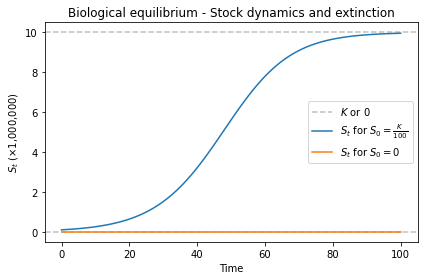

In [7]:
# Biological equilibrium - rebound from near extinction
plt.title('Biological equilibrium - Stock dynamics and extinction')
plt.axhline(10,linestyle='--',color="grey",alpha=.5, label=r'$K$ or 0')
plt.axhline(0,linestyle='--',color="grey",alpha=.5)
plt.plot(T, St, label=r'$S_t$ for $S_0=\frac{K}{100}$')
plt.plot(T, Ste, label=r'$S_t$ for $S_0=0$')
plt.xlabel('Time')
plt.ylabel(r'$S_t$ ($\times$1,000,000)')
plt.tight_layout()
plt.legend()
plt.show()

This plot shows us that when the stock is close to extinction at $S = 100,000$ (which is only 1% of the maximum supported stock of $K$) the stock still manages to rebound to full capacity (when not disturbed). It also shows that extinct fish do not come back.

## Fishing

We now add fishers to the mix. We will look at the plot of $G(S)$ to see what happens in each period regarding the change in the stock.

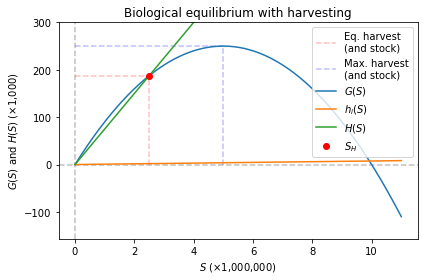

In [8]:
# Bio-harvesting equilibrium Stock
Sb = (1 - (alpha/gamma)*n)*k# Can be found by solving the model

# Biology and harvest
plt.axhline(0,linestyle='--',color="grey",alpha=.5)
plt.axvline(0,linestyle='--',color="grey",alpha=.5)
plt.plot([Sb, Sb], [0,G(gamma=gamma, S=Sb, K=k)*1000], linestyle='--', color="red", alpha=.25)
plt.plot([0, Sb],
         [G(gamma=gamma, S=Sb, K=k)*1000,G(gamma=gamma, S=Sb, K=k)*1000],
         linestyle='--', color="red", alpha=.25, label='Eq. harvest\n(and stock)')
plt.plot([5, 5], [0,G(gamma=gamma, S=5, K=k)*1000], linestyle='--', color="blue", alpha=.25)
plt.plot([0, 5],
         [G(gamma=gamma, S=5, K=k)*1000,G(gamma=gamma, S=5, K=k)*1000],
         linestyle='--', color="blue", alpha=.25, label='Max. harvest\n(and stock)')
plt.title('Biological equilibrium with harvesting')
plt.plot(s, G(gamma=gamma, S=s, K=k)*1000, label=r'$G(S)$')
plt.plot(s, H(alpha=alpha, S=s, e=1)*1000, label=r'$h_i(S)$')
plt.plot(s, H(alpha=alpha, S=s, e=n)*1000, label=r'$H(S)$')
plt.plot(Sb, G(gamma=gamma, S=Sb, K=k)*1000, 'ro', label=r'$S_H$')
plt.ylim(top=300)
plt.xlabel(r'$S$ ($\times$1,000,000)')
plt.ylabel(r'$G(S)$ and $H(S)$ ($\times$1,000)')
plt.tight_layout()
plt.legend()
plt.show()

And similarly we can plot the difference between regeneration and harvest.

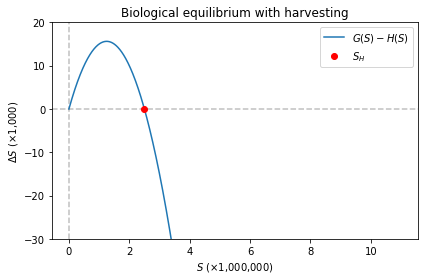

In [9]:
plt.axhline(0,linestyle='--',color="grey",alpha=.5)
plt.axvline(0,linestyle='--',color="grey",alpha=.5)
plt.title('Biological equilibrium with harvesting')
plt.plot(s,
         (G(gamma=gamma, S=s, K=k)-H(alpha=alpha, S=s, e=n))*1000,
         label=r'$G(S) - H(S)$')
plt.plot(Sb, 0, 'ro', label=r'$S_H$')
plt.ylim(bottom=-30, top=20)
plt.xlabel(r'$S$ ($\times$1,000,000)')
plt.ylabel(r'$\Delta S$ ($\times$1,000)')
plt.tight_layout()
plt.legend()
plt.show()

This shows the case where $n=100$ fishers all exerting effort. Also the individual harvesting line is plotted, but the total harvesting line $H$ is the one that matters, as that is the total amount of effort exerted in fishing. This effort pins down the new equilibrium. Anywhere left of the new equilibrium (red dot) (except at $S=0$) natural growth exceeds harvest and thus the stock grows. Anywhere right of the red dot the stock shrinks. The red dot is the new (stable) equilibrium.

Note that the new equilibrium stock is a lot smaller than the biological equilibrium. With the above numbers we find $S_H=2.5$ million which is 4 times smaller than $K=10$ million.

Another interesting observation is that with these numbers periodical harvesting is smaller than maximum. The maximum amount of equilibrium extraction is the max of $G(S)$, which (from visual inspection) is higher than the current periodical harvest. This gives the impression that by restricting fishing a better equilibrium can be achieved for everyone (the fishers and the fish). The last bit is an interesting finding: fewer fisher would be able to catch more fish _in total_ (not only per fisher).

### Free entry

The free entry condition pins down the economic equilibrium stock at which no further profits are possible. If there are positive or negative profits firms would enter or exit the market (i.e. more or less total effort).

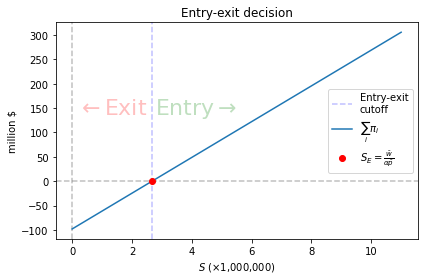

In [10]:
# From your derivations
Ess = (gamma/alpha)*(1-(w/(alpha*p*k)))
Se = w/(alpha*p)

plt.axhline(0,linestyle='--',color="grey",alpha=.5)
plt.axvline(0,linestyle='--',color="grey",alpha=.5)
plt.axvline(Se,linestyle='--',color="blue",alpha=.25, label='Entry-exit\ncutoff')
plt.text(x=1.35,
         y=150,
         s=r'$\leftarrow$Exit',
         color="red",
         alpha=.25,
         # rotation='vertical',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=22)
plt.text(x=4.15,
         y=150,
         s=r'Entry$\rightarrow$',
         color="green",
         alpha=.25,
         # rotation='vertical',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=22)
plt.title('Entry-exit decision')
plt.plot(s, H(alpha=alpha, S=s, e=Ess)*p-Ess*w, label=r'$\sum_i \pi_i$')
plt.plot(Se, 0, 'ro', label=r'$S_E = \frac{\bar{w}}{\alpha \bar{p}}$')
plt.xlabel(r'$S$ ($\times$1,000,000)')
plt.ylabel('million $')
plt.tight_layout()
plt.legend()
plt.show()

Note that the entry-exit decision pins down the number of fishers in the market, which in turn pins down the unique $S$ at which no further entry and exit occurs. This $S$ determines which of the set of biological equilibriums is also the economic equilibrium. Recall from the biological equilibrium that the harvesting line rotates left if $E$ increases. This is what happens if $S>S_E$, until $S= S_E = S_H$. We can plot the figures together so we see how the equilibrium is found.

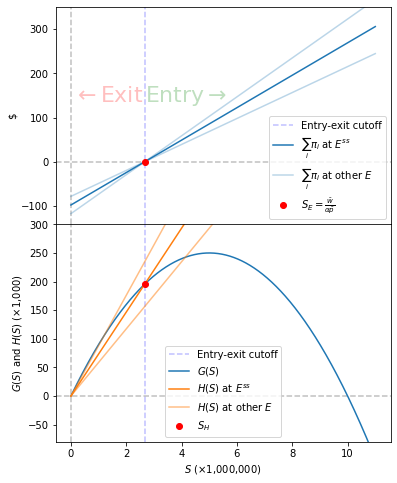

Number of firms in the market: 97.77777777777779


In [11]:
lower = .8
higher = 1.2

fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, sharex=True, sharey=False,
    figsize=(6, 8)
    )

# Formatting of the plot areas
plt.subplots_adjust(wspace=0, hspace=0)

# Entry-exit subplot
ax1.axhline(0,linestyle='--',color="grey",alpha=.5)
ax1.axvline(0,linestyle='--',color="grey",alpha=.5)
ax1.axvline(w/(alpha*p),linestyle='--',color="blue",alpha=.25, label='Entry-exit cutoff')
ax1.text(x=1.35,
         y=150,
         s=r'$\leftarrow$Exit',
         color="red",
         alpha=.25,
         # rotation='vertical',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=22)
ax1.text(x=4.15,
         y=150,
         s=r'Entry$\rightarrow$',
         color="green",
         alpha=.25,
         # rotation='vertical',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=22)
ax1.plot(s,
         H(alpha=alpha, S=s, e=Ess)*p-Ess*w,
         label=r'$\sum_i \pi_i$ at $E^{ss}$', color='tab:blue')
ax1.plot(s,
         H(alpha=alpha, S=s, e=lower*Ess)*p-lower*Ess*w,
         label=r'$\sum_i \pi_i$ at other $E$', color='tab:blue', alpha=.3)#Line for lower E
ax1.plot(s,
         H(alpha=alpha, S=s, e=higher*Ess)*p-higher*Ess*w,
         color='tab:blue', alpha=.3)#Line for higher E
ax1.plot(Se, 0, 'ro', label=r'$S_E = \frac{\bar{w}}{\alpha \bar{p}}$')

# Biology and harvest subplot
ax2.axhline(0,linestyle='--',color="grey",alpha=.5)
ax2.axvline(0,linestyle='--',color="grey",alpha=.5)
ax2.axvline(Se,linestyle='--',color="blue",alpha=.25, label='Entry-exit cutoff')
ax2.plot(s,
         G(gamma=gamma, S=s, K=k)*1000,
         label=r'$G(S)$', color='tab:blue')
ax2.plot(s,
         H(alpha=alpha, S=s, e=Ess)*1000,
         label=r'$H(S)$ at $E^{ss}$', color='tab:orange')
ax2.plot(s,
         H(alpha=alpha, S=s, e=lower*Ess)*1000,
         label=r'$H(S)$ at other $E$', color='tab:orange', alpha=.5)
ax2.plot(s,
         H(alpha=alpha, S=s, e=higher*Ess)*1000,
         color='tab:orange', alpha=.5)
ax2.plot(Se,
         G(gamma=gamma, S=Se, K=k)*1000,
         'ro', label=r'$S_H$')

# Formatting
ax1.set_ylabel('$')
ax1.set_ylim(top=350)
ax1.legend()
ax2.legend()
ax2.set_xlabel(r'$S$ ($\times$1,000,000)')
ax2.set_ylim(bottom=-80,top=300)
ax2.set_ylabel(r'$G(S)$ and $H(S)$ ($\times$1,000)')

plt.show()

print('Number of firms in the market:', Ess)

The above plot shows how the equilibrium comes about. Imagine the situation in which the stock of fish is $S>S_E$. What happens is that in this perfectly competitive market profits are being made (see top graph) and entrants will enter the market, increasing the number of fishers in the market. This has two effects. First, total profits increase (as seen by a rotation upwards in the profit curve). Second, more firms means a higher $E$, so the harvesting curve rotates left (i.e. for each $S$ more is being harvested). The latter results in $H>G$ making the stock $S$ decrease. The above process will repeat itself until $S=S_E$ in which no entrants come into the market anymore. (The same story holds for an initial $S<S_E$, but the mechanism works the other way around.)

### Private property

In the case of the property being owned by a private person, we can simply argue that $S^{pp}>S^{oa}$ (the fish stock is greater under private property than under open access), as the owner requires a strictly positive return $r>0$. By only looking at the entry-exit decision, we can determine whether entry, and thus $E$, is lower in the case of private property. (Spoiler: it is.)

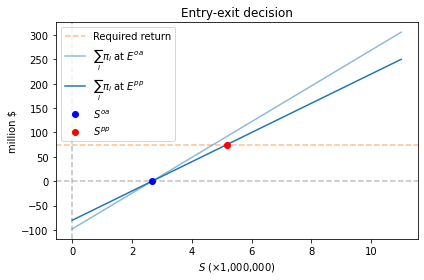

In [12]:
R = 75# Total return
Epp=80# just a number. We do not solve for it here
Spp = ((R/Epp)+w)/(alpha*p)

plt.axhline(0,linestyle='--',color="grey",alpha=.5)
plt.axhline(R,linestyle='--',color="tab:orange",alpha=.5, label='Required return')
plt.axvline(0,linestyle='--',color="grey",alpha=.5)
plt.title('Entry-exit decision')
plt.plot(s,
         H(alpha=alpha, S=s, e=Ess)*p-Ess*w,
         label=r'$\sum_i \pi_i$ at $E^{oa}$', alpha=.5)
plt.plot(s,
         H(alpha=alpha, S=s, e=Epp)*p-Epp*w,
         label=r'$\sum_i \pi_i$ at $E^{pp}$', color='tab:blue')#Line for new E
plt.plot(Se, 0, 'bo', label=r'$S^{oa}$')
plt.plot(Spp, R, 'ro', label=r'$S^{pp}$')
plt.xlabel(r'$S$ ($\times$1,000,000)')
plt.ylabel('million $')
plt.tight_layout()
plt.legend()
plt.show()

The point of entry shifts towards the right, meaning that less total effort $E$ will be exerted. Further, the profit curves rotates to the right as for each $S$ lower $E$ results in less profit. This brings the point of entry even further to the right.